### Netflix EDA
- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`
- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색

## 0. 초기 설정

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [229]:
import os

if not os.path.exists("datas"):
    os.makedirs("datas")
if not os.path.exists("datas/images"):
    os.makedirs("datas/images")

##  1. 넷플릭스 서비스 국가 목록 크롤링

- `https://flixpatrol.com` 에는 총 90개국의 넷플릭스 관련 데이터가 있습니다.
- 국가 별로 정보를 분류하기 위해 넷플릭스를 서비스 하는 국가 목록을 크롤링 하였습니다.

In [52]:
def country_list():
    url = f"https://flixpatrol.com/top10/netflix/world/2021/full/"
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select("body > div.content.mt-6 > div.md\:flex.gap-4.items-center.justify-between > div:nth-child(2) > div > div:nth-child(2) > div > div > a")
    datas = []
    for element in elements:
        datas.append({
            'name': element.text.strip(),
        })
    
    return pd.DataFrame(datas)

In [67]:
country_list().to_csv("datas/netflix_countries.csv", index=False)

- 총 90개국의 국가명을 `datas/netflix_countries.csv`에 저장하였습니다.

In [87]:
country = pd.read_csv('datas/netflix_countries.csv')
country.tail()

,name
85,United Kingdom
86,United States
87,Uruguay
88,Venezuela
89,Vietnam


## 2. 국가별 TOP 100 영화 크롤링

- 국가명을 매개변수로 국가별 넷플릭스 영화 순위를 크롤링하는 함수를 작성하였습니다.
- country 행을 추가하여 국가 정보를 추가하였습니다.

In [125]:
def top_movies(country, year=2021):
    url = f"https://flixpatrol.com/top10/netflix/{country}/{year}/full/"
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")
    datas = []
    for element in elements:
        datas.append({
            'title': element.select("td")[2].text.strip(),
            'country': country,
            'points': int(element.select("td")[3].text.replace(',','')),
            'countries': int(element.select("td")[5].text),
            'days': int(element.select("td")[7].text),
            'link': 'https://flixpatrol.com' + element.select("td")[2].select_one("a").get("href"),
        })
    
    return pd.DataFrame(datas)

- DataFrame data를 전세계 순위 데이터로 초기화 하였습니다.
- 그리고 각 국가별 순위 데이터를 concat으로 병합하였습니다.
- data를 `datas/netflix_top_movies_2021.csv`에 저장하였습니다.

In [126]:
data = top_movies('world')
data.tail()

,title,country,points,countries,days,link
171,Scoob!,world,202,1,28,https://flixpatrol.com/title/scoob/
172,The Son of Bigfoot,world,192,7,8,https://flixpatrol.com/title/the-son-of-bigfoot/
173,Ava,world,186,4,29,https://flixpatrol.com/title/ava-2020/
174,Bombshell,world,181,2,14,https://flixpatrol.com/title/bombshell/
175,Man on a Ledge,world,174,4,13,https://flixpatrol.com/title/man-on-a-ledge/


In [102]:
country = pd.read_csv('datas/netflix_countries.csv')
for name in country['name']:
    data = pd.concat([data, top_movies(name)])

In [103]:
data.groupby('country').count().tail()

,title,points,countries,days,link
country,,,,,
Ukraine,190,190,190,190,190
Uruguay,234,234,234,234,234
Venezuela,223,223,223,223,223
Vietnam,214,214,214,214,214
world,176,176,176,176,176


In [104]:
data.to_csv("datas/netflix_top_movies_2021.csv", index=False)

## 3. 국가별 TOP 100 TV Show 크롤링

- 국가명을 매개변수로 국가별 넷플릭스 TV Show 순위를 크롤링하는 함수를 작성하였습니다.
- country 행을 추가하여 국가 정보를 추가하였습니다.

In [127]:
def top_tvshows(country, year=2021):
    url = f"https://flixpatrol.com/top10/netflix/{country}/{year}/full/"
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select("#netflix-2 > div.-mx-content > div > div > table > tbody > tr")
    datas = []
    for element in elements:
        datas.append({
            'title': element.select("td")[2].text.strip(),
            'country': country,
            'points': int(element.select("td")[3].text.replace(',','')),
            'countries': int(element.select("td")[5].text),
            'days': int(element.select("td")[7].text),
            'link': 'https://flixpatrol.com' + element.select("td")[2].select_one("a").get("href"),
        })
    
    return pd.DataFrame(datas)

- DataFrame data를 전세계 순위 데이터로 초기화 하였습니다.
- 그리고 각 국가별 순위 데이터를 concat으로 병합하였습니다.
- data를 `datas/netflix_top_tvshows_2021.csv`에 저장하였습니다.

In [128]:
data = top_tvshows('world')
data.tail()

,title,country,points,countries,days,link
147,Fatma,world,1680,44,47,https://flixpatrol.com/title/fatma-2021/
148,Sweet Home,world,1656,22,50,https://flixpatrol.com/title/sweet-home-2020/
149,Outlander,world,1642,22,104,https://flixpatrol.com/title/outlander-2014/
150,Beauty and the Baker,world,1638,18,28,https://flixpatrol.com/title/beauty-and-the-ba...
151,Zero Chill,world,1631,49,20,https://flixpatrol.com/title/zero-chill/


In [117]:
country = pd.read_csv('datas/netflix_countries.csv')
for name in country['name']:
    data = pd.concat([data, top_tvshows(name)])

In [118]:
data.groupby('country').count().tail()

,title,points,countries,days,link
country,,,,,
Ukraine,132,132,132,132,132
Uruguay,164,164,164,164,164
Venezuela,130,130,130,130,130
Vietnam,127,127,127,127,127
world,152,152,152,152,152


In [119]:
data.to_csv("datas/netflix_top_tvshows_2021.csv", index=False)

## 4. 년도별  크롤링

- 같은 방법으로 2020년 넷플릭스 영화 순위를 크롤링 하였습니다.

In [129]:
data = top_movies('world', 2020)
data.tail()

,title,country,points,countries,days,link
96,Night School,world,2299,40,153,https://flixpatrol.com/title/night-school-2018/
97,Coffee & Kareem,world,2289,42,14,https://flixpatrol.com/title/coffee-kareem/
98,Focus,world,2280,18,110,https://flixpatrol.com/title/focus/
99,Seriously Single,world,2251,50,21,https://flixpatrol.com/title/seriously-single/
100,The F**k-It List,world,2209,32,35,https://flixpatrol.com/title/the-fk-it-list/


In [130]:
country = pd.read_csv('datas/netflix_countries.csv')
for name in country['name']:
    data = pd.concat([data, top_movies(name, 2020)])

In [131]:
data.groupby('country').count().tail()

,title,points,countries,days,link
country,,,,,
Ukraine,107,107,107,107,107
Uruguay,164,164,164,164,164
Venezuela,134,134,134,134,134
Vietnam,136,136,136,136,136
world,101,101,101,101,101


In [132]:
data.to_csv("datas/netflix_top_movies_2020.csv", index=False)

- 같은 방법으로 2020년 넷플릭스 TV Show 순위를 크롤링 하였습니다.

In [133]:
data = top_tvshows('world', 2020)
data.tail()

,title,country,points,countries,days,link
96,Grizzy & the Lemmings,world,2664,53,74,https://flixpatrol.com/title/grizzy-the-lemmings/
97,Alien Worlds,world,2653,72,14,https://flixpatrol.com/title/alien-worlds/
98,Bimilui Soop,world,2567,7,126,https://flixpatrol.com/title/bimilui-soop/
99,Baby,world,2541,50,34,https://flixpatrol.com/title/baby-2018/
100,The Last Dance,world,184,0,0,https://flixpatrol.com/title/the-last-dance/


In [134]:
country = pd.read_csv('datas/netflix_countries.csv')
for name in country['name']:
    data = pd.concat([data, top_tvshows(name, 2020)])

In [135]:
data.groupby('country').count().tail()

,title,points,countries,days,link
country,,,,,
Ukraine,104,104,104,104,104
Uruguay,143,143,143,143,143
Venezuela,68,68,68,68,68
Vietnam,90,90,90,90,90
world,101,101,101,101,101


In [136]:
data.to_csv("datas/netflix_top_tvshows_2020.csv", index=False)

## 5. 2021년 월간 순위

- 속도 문제로 월간, top 10 정보만 수집하였습니다.

In [210]:
def top10_movies(country, date=2021):
    url = f"https://flixpatrol.com/top10/netflix/{country}/{date}/"
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")
    datas = []
    for element in elements:
        datas.append({
            'title': element.select("td")[1].text.strip(),
            'country': country,
            'date': date,
            'points': int(element.select("td")[2].text.replace(',','')),
            'link': 'https://flixpatrol.com' + element.select("td")[1].select_one("a").get("href"),
            "img": 'https://flixpatrol.com' + element.select_one("img").get("src"),
        })
    
    return pd.DataFrame(datas)

In [211]:
data = pd.DataFrame()

In [212]:
country = pd.read_csv('datas/netflix_countries.csv')

for i in range(1, 13):
    data = pd.concat([data, top10_movies('world', '2021-{0:02d}'.format(i))])

In [214]:
data.tail()

,title,country,date,points,link,img
5,Spoiled Brats,world,2021-12,4978,https://flixpatrol.com/title/spoiled-brats/,https://flixpatrol.com/runtime/cache/files/pos...
6,A Boy Called Christmas,world,2021-12,4902,https://flixpatrol.com/title/a-boy-called-chri...,https://flixpatrol.com/runtime/cache/files/pos...
7,The Power of the Dog,world,2021-12,3797,https://flixpatrol.com/title/the-power-of-the-...,https://flixpatrol.com/runtime/cache/files/pos...
8,A Castle for Christmas,world,2021-12,3575,https://flixpatrol.com/title/a-castle-for-chri...,https://flixpatrol.com/runtime/cache/files/pos...
9,A California Christmas: City Lights,world,2021-12,3164,https://flixpatrol.com/title/a-california-chri...,https://flixpatrol.com/runtime/cache/files/pos...


In [215]:
data.to_csv("datas/netflix_top10_movies_2021.csv", index=False)

- 영화의 썸네일 이미지를 저장하였습니다.

In [230]:
for img in data["img"]:
    response = requests.get(img)
    with open("datas/images/" + img.split('/')[-1], "wb") as file:
        file.write(response.content)

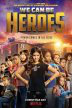

In [243]:
from PIL import Image as pil

pil.open("datas/images/" + data.iloc[0]['img'].split('/')[-1])

## 6. kaggle 데이터 읽기

In [233]:
df = pd.read_csv('datas/netflix_titles.csv')
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 7. 데이터 분석 및 시각화

### 오징어게임의 인기 순위 시각화

In [11]:
df = pd.read_csv('datas/netflix_top10_tvshows_2021_daily.csv')
df['date'] = pd.to_datetime(df['date'])
df.tail()

,title,country,date,points,link,img
3646,Squid Game,world,2021-12-31,189,https://flixpatrol.com/title/squid-game/,https://flixpatrol.com/runtime/cache/files/pos...
3647,The Girl from Oslo,world,2021-12-31,181,https://flixpatrol.com/title/the-girl-from-oslo/,https://flixpatrol.com/runtime/cache/files/pos...
3648,Café con aroma de mujer,world,2021-12-31,171,https://flixpatrol.com/title/cafe-con-aroma-de...,https://flixpatrol.com/runtime/cache/files/pos...
3649,Kitz,world,2021-12-31,148,https://flixpatrol.com/title/kitz/,https://flixpatrol.com/runtime/cache/files/pos...
3650,Madre solo hay dos,world,2021-12-31,124,https://flixpatrol.com/title/madre-solo-hay-dos/,https://flixpatrol.com/runtime/cache/files/pos...


In [13]:
pivoted_df = df[(df['date'] >= '2021-09-01')].pivot(index='date',columns='title',values='points').fillna(0)
pivoted_df.tail()

title,A Tale Dark & Grimm,AlRawabi School for Girls,Alice in Borderland,Animal,Aranyak,Arcane,Baki Hanma,Big Mouth,Blood & Water,Braqueurs: La série,...,The Silent Sea,The Snitch Cartel: Origins,The Witcher,"Tiger King: Murder, Mayhem and Madness",Titans,True Story,Turning Point: 9/11 and the War on Terror,WWII in Color: Road to Victory,Yo soy Betty la fea,You
date,,,,,,,,,,,,,,,,,,,,,
2021-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,558.0,0.0,763.0,0.0,0.0,0.0,0.0,159.0,0.0,0.0
2021-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,574.0,0.0,742.0,0.0,0.0,0.0,0.0,152.0,84.0,0.0
2021-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,582.0,0.0,738.0,0.0,0.0,0.0,0.0,143.0,0.0,0.0
2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,552.0,0.0,722.0,0.0,0.0,0.0,0.0,127.0,0.0,0.0
2021-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,514.0,0.0,722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivoted_df.plot_animated(filename='total.gif',n_visible=10,period_fmt="%Y-%m-%d",fixed_max=True)

- 오징어게임의 월별 순위를 시각화 하였습니다.

![](2021-09.gif)

![](2021-10.gif)

![](2021-11.gif)

![](2021-12.gif)

### 누적 포인트 시각화 

In [15]:
data = df[(df['date'] >= '2021-09-01')].copy()
data.tail(2)

,title,country,date,points,link,img
3649,Kitz,world,2021-12-31,148,https://flixpatrol.com/title/kitz/,https://flixpatrol.com/runtime/cache/files/pos...
3650,Madre solo hay dos,world,2021-12-31,124,https://flixpatrol.com/title/madre-solo-hay-dos/,https://flixpatrol.com/runtime/cache/files/pos...


In [18]:
data_sum = data.groupby('title')[['points']].sum()
data_sum.sort_values(axis=0, by='points', ascending=False, inplace=True)
data_sum.head()

,points
title,
Squid Game,58150
Money Heist,34617
Maid,27340
You,22877
Sex Education,18796


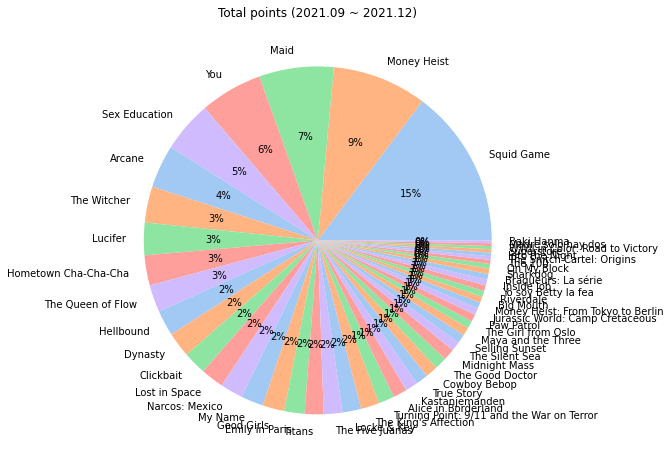

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(x = data_sum['points'].head(50), labels=data_sum.head(50).index,colors=colors, autopct='%.0f%%')
plt.title('Total points (2021.09 ~ 2021.12)')
# plt.savefig('plt02.png', dpi=300)
plt.show()

###  국가비율 시각화

In [23]:
data = pd.read_csv('datas/netflix_titles.csv')
df_LEFT_JOIN = pd.merge(df, data, left_on='title', right_on='title', how='left')
data = df_LEFT_JOIN[(df_LEFT_JOIN['date'] >= '2021-10-01')&(df_LEFT_JOIN['date'] < '2021-11-01')].drop_duplicates(['title']).copy()
data.loc[data['title'] == 'Squid Game', 'country_y'] = 'South Korea'
data.groupby('country_y').count()

,title,country_x,date,points,link,img,show_id,type,director,cast,date_added,release_year,rating,duration,listed_in,description
country_y,,,,,,,,,,,,,,,,
"Canada, United States",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
Japan,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
South Korea,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
United Kingdom,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
United States,7,7,7,7,7,7,7,7,2,7,7,7,7,7,7,7


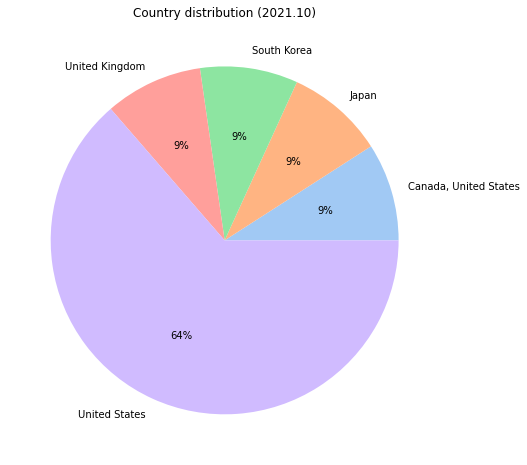

In [28]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(x = data.groupby('country_y').count()['title'], labels=data.groupby('country_y').count().index,colors=colors, autopct='%.0f%%')
plt.title('Country distribution (2021.10)')
# plt.savefig('plt01.png', dpi=300)
plt.show()